<a href="https://colab.research.google.com/github/Isaias00C/MachineLearn/blob/main/MachineLearnSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas necessárias
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import numpy as np

In [ ]:
# Carregando o dataset Iris
iris = datasets.load_iris()
X = iris.data  # características (comprimento e largura das sépalas e pétalas)
y = iris.target  # classes (0 = setosa, 1 = versicolor, 2 = virginica)

In [ ]:
acurracies_linear = []
acurracies_poly = []
acurracies_rbf = []
acurracies_sigmoid = []

# análise da acuracia para cada kernel, mantendo fixo C = 1.0 e gamma = 'scale'

# linear
for i in range(15):
  # Dividindo em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Normalizando os dados
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Criando o modelo SVM com kernel RBF
  model = SVC(kernel='linear', C=1.0, gamma='scale')  # C e gamma são hiperparâmetros
  model.fit(X_train, y_train)

  # Fazendo previsões
  y_pred = model.predict(X_test)

  result = accuracy_score(y_pred, y_test)
  acurracies_linear.append(result)

# polinomial
for i in range(15):
  # Dividindo em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Normalizando os dados
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Criando o modelo SVM com kernel RBF
  model = SVC(kernel='poly', C=1.0, gamma='scale')  # nesse caso do kernel='poly' por default o grau do polinomio é 3 (degree=3)
  model.fit(X_train, y_train)

  # Fazendo previsões
  y_pred = model.predict(X_test)

  result = accuracy_score(y_pred, y_test)
  acurracies_poly.append(result)

# rbf
for i in range(15):
  # Dividindo em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Normalizando os dados
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Criando o modelo SVM com kernel RBF
  model = SVC(kernel='rbf', C=1.0, gamma='scale')  # C e gamma são hiperparâmetros
  model.fit(X_train, y_train)

  # Fazendo previsões
  y_pred = model.predict(X_test)

  result = accuracy_score(y_pred, y_test)
  acurracies_rbf.append(result)

# sigmoid
for i in range(15):
  # Dividindo em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Normalizando os dados
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Criando o modelo SVM com kernel RBF
  model = SVC(kernel='sigmoid', C=1.0, gamma='scale')  # C e gamma são hiperparâmetros
  model.fit(X_train, y_train)

  # Fazendo previsões
  y_pred = model.predict(X_test)

  result = accuracy_score(y_pred, y_test)
  acurracies_sigmoid.append(result)



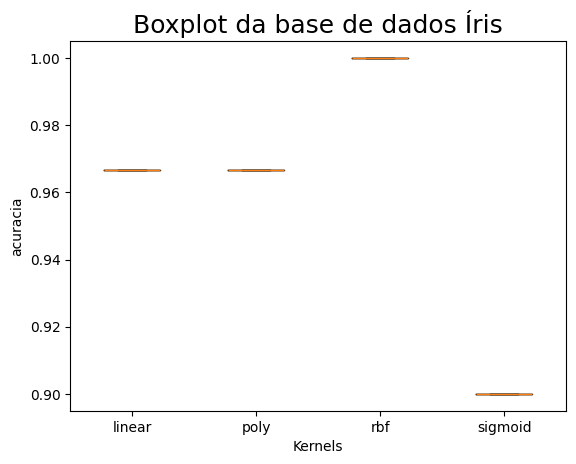

In [ ]:
# box-plot
fig, ax = plt.subplots()
X_boxPlot = ['linear', 'poly', 'rbf', 'sigmoid']

acurracies_linear = np.array(acurracies_linear)
acurracies_poly = np.array(acurracies_poly)
acurracies_rbf = np.array(acurracies_rbf)
acurracies_sigmoid = np.array(acurracies_sigmoid)

data_acuracies = [acurracies_linear, acurracies_poly, acurracies_rbf, acurracies_sigmoid]

bplots = plt.boxplot(data_acuracies,  vert = 1, patch_artist = False)
plt.title("Boxplot da base de dados Íris", loc="center", fontsize=18)
plt.xlabel("Kernels")
plt.ylabel("acuracia")
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(X_boxPlot)
plt.show()

In [ ]:
# Visualizando a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM no Iris Dataset")

plt.show()

In [ ]:
# visualisando grafico de acurácia



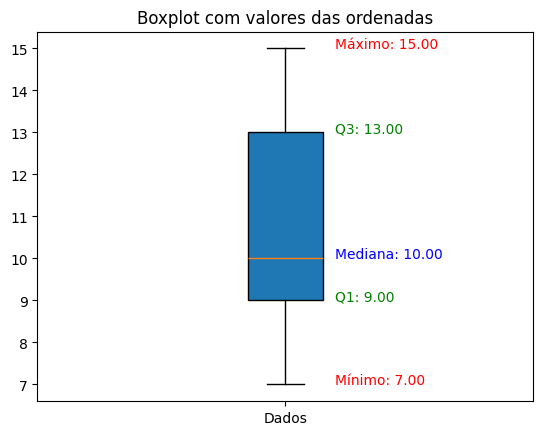

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
dados = [7, 8, 8, 9, 10, 10, 10, 11, 12, 13, 13, 14, 15]

# Criar o boxplot
fig, ax = plt.subplots()
box = ax.boxplot(dados, vert=True, patch_artist=True)

# Obter as estatísticas do boxplot
stats = {
    "mediana": np.median(dados),
    "q1": np.percentile(dados, 25),
    "q3": np.percentile(dados, 75),
    "min": np.min(dados),
    "max": np.max(dados)
}

# Adicionar os valores das estatísticas no gráfico
ax.text(1.1, stats["mediana"], f'Mediana: {stats["mediana"]:.2f}', color='blue')
ax.text(1.1, stats["q1"], f'Q1: {stats["q1"]:.2f}', color='green')
ax.text(1.1, stats["q3"], f'Q3: {stats["q3"]:.2f}', color='green')
ax.text(1.1, stats["min"], f'Mínimo: {stats["min"]:.2f}', color='red')
ax.text(1.1, stats["max"], f'Máximo: {stats["max"]:.2f}', color='red')

# Configurar o gráfico
ax.set_title("Boxplot com valores das ordenadas")
ax.set_xticks([1])
ax.set_xticklabels(["Dados"])
plt.show()